In [9]:
import pandas as pd
import numpy as np

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, RobustScaler

# Model
from sklearn.linear_model import LogisticRegression

# Evaluasi
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [10]:
df = pd.read_csv("hcvdat0.csv")

df.head()


,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [11]:
# Drop 'Unnamed: 0' if it exists in df before creating X
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

X = df.drop("Category", axis=1)
y = df["Category"]

encoding

In [12]:
le_sex = LabelEncoder()
X["Sex"] = le_sex.fit_transform(X["Sex"])


In [13]:
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

# Lihat mapping label
label_mapping = dict(zip(le_target.classes_, le_target.transform(le_target.classes_)))
label_mapping


{'0=Blood Donor': np.int64(0),
 '0s=suspect Blood Donor': np.int64(1),
 '1=Hepatitis': np.int64(2),
 '2=Fibrosis': np.int64(3),
 '3=Cirrhosis': np.int64(4)}

In [16]:
# Imputasi median
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())


In [17]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       615 non-null    float64
 4   ALP       615 non-null    float64
 5   ALT       615 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      615 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      615 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,47.408130,41.620732,68.222927,28.441951,34.786341,11.396748,8.196634,5.366992,81.287805,39.533171,72.044390
std,10.055105,5.775935,25.646364,25.449889,33.090690,19.673150,2.205657,1.123499,49.756166,54.661071,5.398238
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.950000,16.400000,21.600000,5.300000,6.935000,4.620000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,79.300000,33.050000,32.900000,11.200000,9.590000,6.055000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


splittig data


In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)


In [19]:
scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [20]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


scalling data

In [21]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)


Balancing data Smote

In [22]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(
    X_train_scaled, y_train
)

print("Shape of X_train_scaled before SMOTE:", X_train_scaled.shape)
print("Shape of y_train before SMOTE:", y_train.shape)
print("Shape of X_train_smote after SMOTE:", X_train_smote.shape)
print("Shape of y_train_smote after SMOTE:", y_train_smote.shape)
print("Class distribution in y_train before SMOTE:\n", pd.Series(y_train).value_counts())
print("Class distribution in y_train_smote after SMOTE:\n", pd.Series(y_train_smote).value_counts())

Shape of X_train_scaled before SMOTE: (492, 12)
Shape of y_train before SMOTE: (492,)
Shape of X_train_smote after SMOTE: (2130, 12)
Shape of y_train_smote after SMOTE: (2130,)
Class distribution in y_train before SMOTE:
 0    426
4     24
2     19
3     17
1      6
Name: count, dtype: int64
Class distribution in y_train_smote after SMOTE:
 2    426
0    426
4    426
3    426
1    426
Name: count, dtype: int64


logistic regression

Training Logistic Regression model with hyperparameter tuning...
Training complete.

Best Hyperparameters:
{'model__C': 0.01, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}

--- Logistic Regression Model Evaluation (Tuned) ---
Accuracy: 0.926829268292683
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       107
           1       0.50      1.00      0.67         1
           2       0.43      0.60      0.50         5
           3       0.57      1.00      0.73         4
           4       1.00      0.83      0.91         6

    accuracy                           0.93       123
   macro avg       0.70      0.88      0.75       123
weighted avg       0.95      0.93      0.93       123



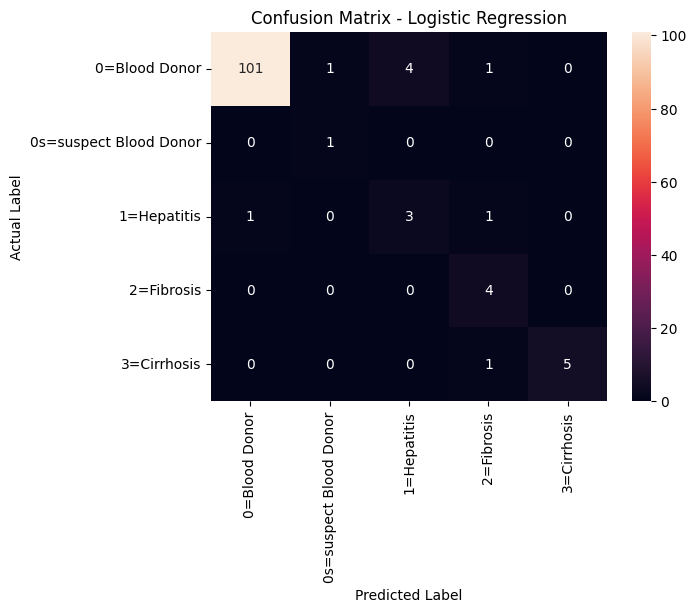

Logistic Regression model saved as logistic_regression_smote_tuned.pkl


In [65]:
# ===============================
# IMPORT
# ===============================
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, classification_report

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

import joblib

# ===============================
# SPLIT DATA
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

# ===============================
# PIPELINE (IMPUTER + SCALER + SMOTE + LOGREG)
# ===============================
pipeline_lr = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", RobustScaler()),
    ("smote", SMOTE(
        random_state=42,
        k_neighbors=2      # 🔥 FIX untuk data kecil & imbalanced
    )),
    ("model", LogisticRegression(
        max_iter=1000,
        random_state=42
    ))
])

# ===============================
# HYPERPARAMETER GRID (TUNING)
# ===============================
param_grid = {
    "model__C": [0.01, 0.1, 1, 10, 100],
    "model__solver": ["lbfgs", "liblinear"],
    "model__penalty": ["l2"]
}

# ===============================
# GRID SEARCH
# ===============================
grid_search = GridSearchCV(
    estimator=pipeline_lr,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    error_score="raise"
)

# ===============================
# TRAIN MODEL (DENGAN TUNING)
# ===============================
print("Training Logistic Regression model with hyperparameter tuning...")
grid_search.fit(X_train, y_train)
print("Training complete.")

# ===============================
# BEST MODEL
# ===============================
best_lr = grid_search.best_estimator_

print("\nBest Hyperparameters:")
print(grid_search.best_params_)

# ===============================
# EVALUATION
# ===============================
y_pred = best_lr.predict(X_test)

print("\n--- Logistic Regression Model Evaluation (Tuned) ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(
    y_test,
    y_pred,
    zero_division=0
))

# ===============================
# Confussion matrix
# ===============================
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    xticklabels=le_target.classes_,
    yticklabels=le_target.classes_
)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# ===============================
# SAVE MODEL (.pkl)
# ===============================
joblib.dump(best_lr, "logistic_regression_smote_tuned.pkl")
print("Logistic Regression model saved as logistic_regression_smote_tuned.pkl")


In [28]:
print("Missing Values:\n", df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())
print("\nClass Distribution:\n", df['Category'].value_counts())
print("\nClass Distribution (%):\n", df['Category'].value_counts(normalize=True)*100)


Missing Values:
 Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

Duplicate Rows: 0

Class Distribution:
 Category
0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: count, dtype: int64

Class Distribution (%):
 Category
0=Blood Donor             86.666667
3=Cirrhosis                4.878049
1=Hepatitis                3.902439
2=Fibrosis                 3.414634
0s=suspect Blood Donor     1.138211
Name: proportion, dtype: float64


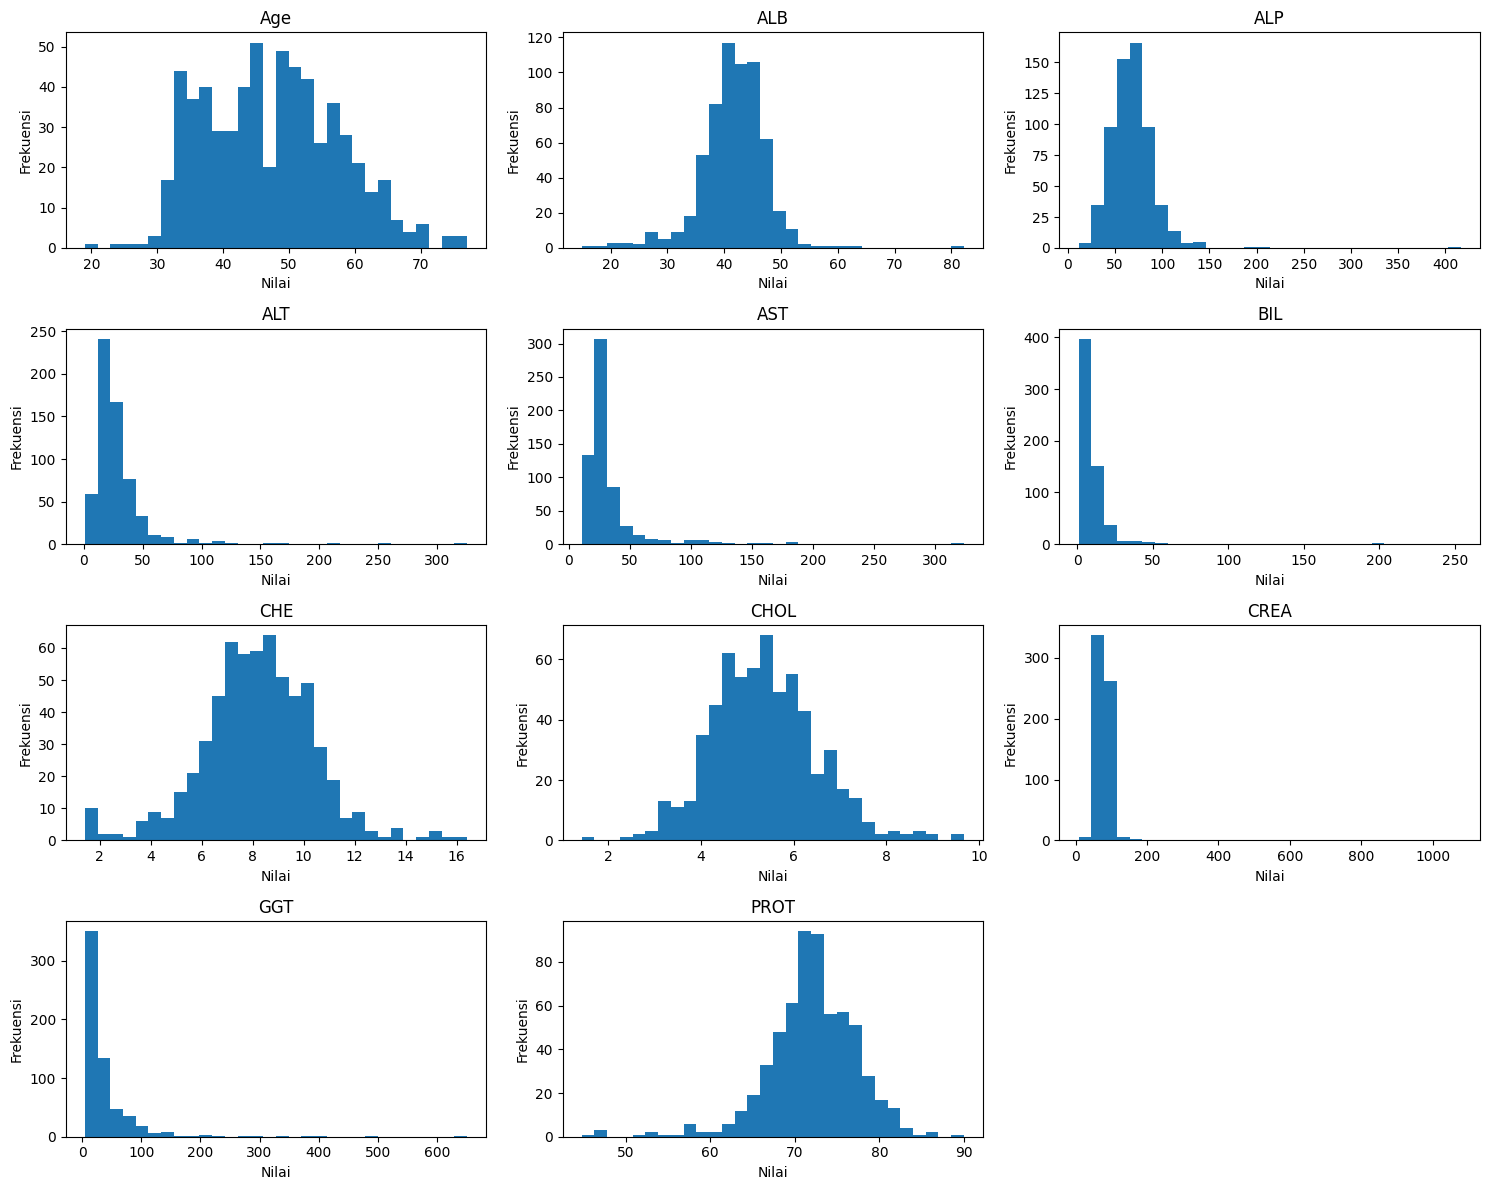

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ambil fitur numerik saja (kecuali Category)
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

if "Sex" in numeric_cols:
    numeric_cols = numeric_cols.drop("Sex")

# Plot histogram semua fitur
plt.figure(figsize=(15, 12))

# Calculate optimal grid size
num_plots = len(numeric_cols)
rows = (num_plots + 2) // 3 # roughly 3 columns
cols = 3

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols, i)
    plt.hist(df[col], bins=30)
    plt.title(col)
    plt.xlabel("Nilai")
    plt.ylabel("Frekuensi")

plt.tight_layout()
plt.show()

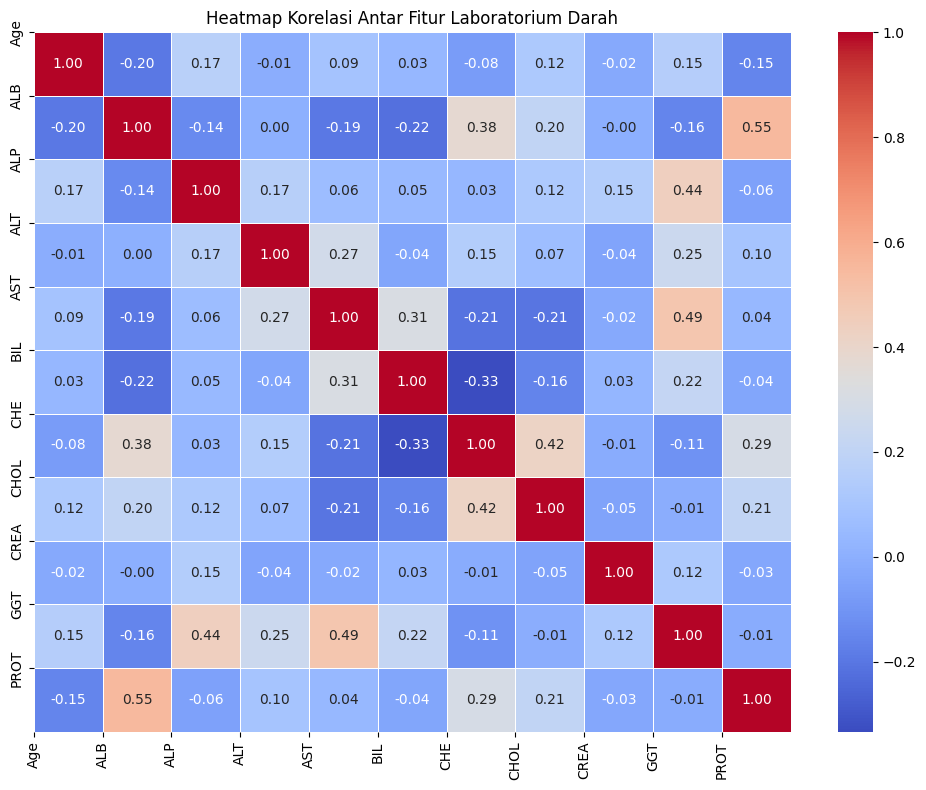

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (df is already available in the kernel, but loading again as per user's request)
df = pd.read_csv("hcvdat0.csv")

# Drop kolom tidak berguna ('Unnamed: 0')
df = df.drop(columns=['Unnamed: 0'])

# Imputasi median untuk kolom numerik (dilakukan kembali karena df di-load ulang)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Ambil fitur numerik
numeric_df = df.select_dtypes(include=["int64", "float64"])

# Hitung korelasi
corr = numeric_df.corr()

# Plot heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=.5
)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Heatmap Korelasi Antar Fitur Laboratorium Darah")
plt.tight_layout()
plt.show()

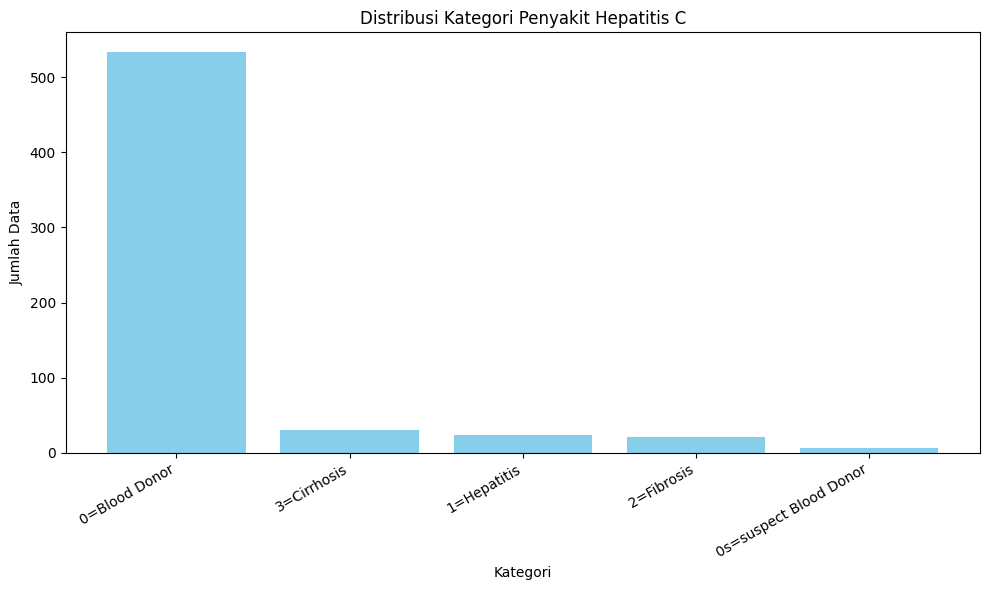

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("hcvdat0.csv")

# Hitung distribusi kategori
class_counts = df["Category"].value_counts()

# Bar plot
plt.figure(figsize=(10, 6))
plt.bar(class_counts.index, class_counts.values, color='skyblue')
plt.xlabel("Kategori")
plt.ylabel("Jumlah Data")
plt.title("Distribusi Kategori Penyakit Hepatitis C")
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

FEATURE ENGINEERING (UNTUK SEMUA MODEL)

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Load dataset
df = pd.read_csv("hcvdat0.csv")

# Drop kolom tidak berguna (Unnamed: 0)
df = df.drop(columns=['Unnamed: 0'])

# Identifikasi kolom numerik untuk imputasi
numerical_cols_for_imputation = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
# Pastikan 'Sex' tidak diimputasi jika sudah diidentifikasi sebagai numerik dan akan di-encode
if 'Sex' in numerical_cols_for_imputation:
    numerical_cols_for_imputation.remove('Sex')

# Imputasi median untuk fitur numerik yang tersisa
imputer = SimpleImputer(strategy='median')
df[numerical_cols_for_imputation] = imputer.fit_transform(df[numerical_cols_for_imputation])

# Encode 'Sex' column
label_encoder_sex = LabelEncoder()
df['Sex'] = label_encoder_sex.fit_transform(df['Sex'])

# Pisahkan fitur dan target
X = df.drop(columns=["Category"])
y = df["Category"]

# Encode target
label_encoder_target = LabelEncoder() # Menggunakan nama unik untuk menghindari bentrok
y_encoded = label_encoder_target.fit_transform(y)

In [71]:
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()

print("Numerical features:", numeric_features)
print("Categorical features:", categorical_features)

Numerical features: ['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']
Categorical features: []


Training Random Forest model with hyperparameter tuning...
Training complete.

Best Hyperparameters:
{'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 100}

--- Random Forest Model Evaluation (Tuned) ---
Accuracy: 0.943089430894309
                        precision    recall  f1-score   support

         0=Blood Donor       0.97      1.00      0.99       107
0s=suspect Blood Donor       0.00      0.00      0.00         1
           1=Hepatitis       0.60      0.60      0.60         5
            2=Fibrosis       0.33      0.25      0.29         4
           3=Cirrhosis       1.00      0.83      0.91         6

              accuracy                           0.94       123
             macro avg       0.58      0.54      0.56       123
          weighted avg       0.93      0.94      0.94       123



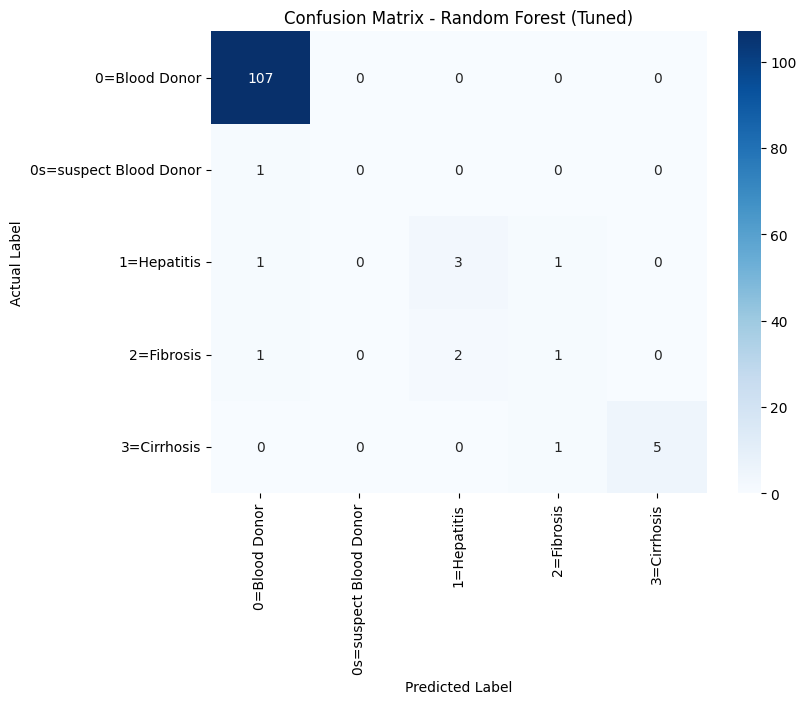

Random Forest model saved as random_forest_smote_tuned.pkl


In [63]:
# ===============================
# IMPORT
# ===============================
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================
# PIPELINE (FIXED SMOTE)
# ===============================
pipeline_rf = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", RobustScaler()),
    ("smote", SMOTE(
        random_state=42,
        k_neighbors=2   # 🔥 FIX UTAMA
    )),
    ("model", RandomForestClassifier(
        random_state=42,
        n_jobs=-1
    ))
])

# ===============================
# HYPERPARAMETER GRID
# ===============================
param_grid = {
    "model__n_estimators": [100, 200],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_split": [2, 5],
    "model__min_samples_leaf": [1, 2],
    "model__max_features": ["sqrt"]
}

# ===============================
# GRID SEARCH
# ===============================
grid_search = GridSearchCV(
    estimator=pipeline_rf,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    error_score="raise"   # kalau error, langsung kelihatan
)

# ===============================
# TRAIN MODEL
# ===============================
print("Training Random Forest model with hyperparameter tuning...")
grid_search.fit(X_train, y_train)
print("Training complete.")

# ===============================
# BEST MODEL
# ===============================
best_rf = grid_search.best_estimator_

print("\nBest Hyperparameters:")
print(grid_search.best_params_)

# ===============================
# EVALUATION
# ===============================
y_pred_rf = best_rf.predict(X_test)

print("\n--- Random Forest Model Evaluation (Tuned) ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(
    y_test,
    y_pred_rf,
    target_names=le_target.classes_,
    zero_division=0
))

# ===============================
# CONFUSION MATRIX
# ===============================
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm_rf,
    annot=True,
    fmt='d',
    xticklabels=le_target.classes_,
    yticklabels=le_target.classes_,
    cmap="Blues"
)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Random Forest (Tuned)")
plt.show()

# ===============================
# SAVE MODEL
# ===============================
joblib.dump(best_rf, "random_forest_smote_tuned.pkl")
print("Random Forest model saved as random_forest_smote_tuned.pkl")


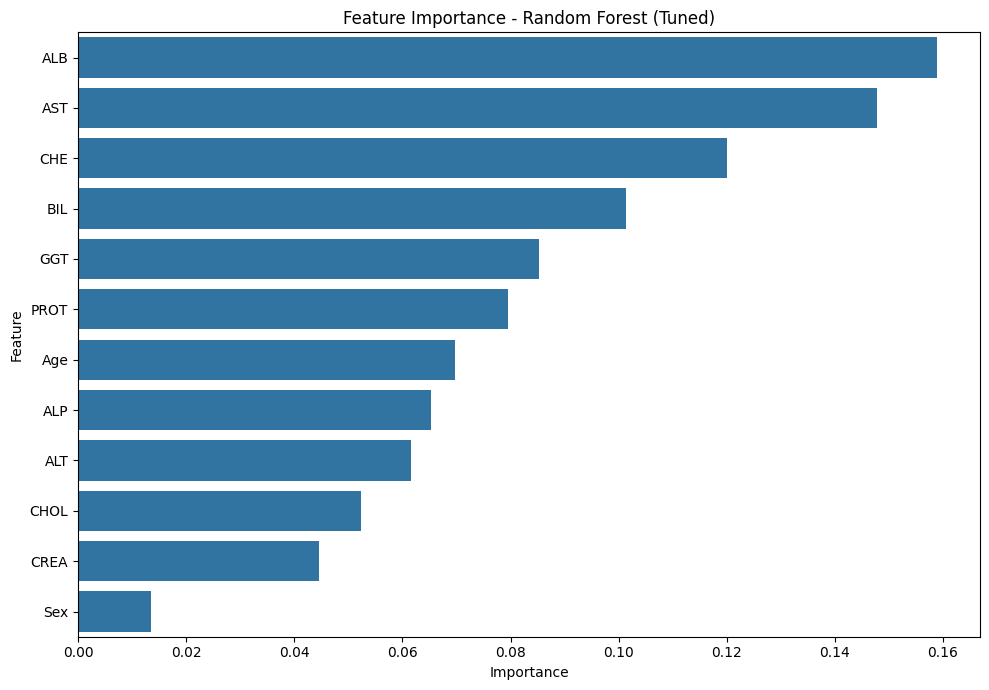

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# ===============================
# AMBIL MODEL RANDOM FOREST TERLATIH
# ===============================
rf_model = best_rf.named_steps['model']

# ===============================
# FEATURE IMPORTANCE
# ===============================
importances = rf_model.feature_importances_

# ===============================
# FEATURE NAMES
# ===============================
feature_names = X_train.columns.tolist()

# Hapus kolom Unnamed jika ada
if 'Unnamed: 0' in feature_names:
    idx = feature_names.index('Unnamed: 0')
    feature_names.pop(idx)
    importances = np.delete(importances, idx)

# ===============================
# DATAFRAME
# ===============================
feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# ===============================
# VISUALISASI
# ===============================
plt.figure(figsize=(10, 7))
sns.barplot(
    data=feature_importance_df,
    x="Importance",
    y="Feature"
)
plt.title("Feature Importance - Random Forest (Tuned)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [74]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Muat dataset
df = pd.read_csv("hcvdat0.csv")

# 1. Hapus kolom yang tidak berguna
# Kolom 'Unnamed: 0' seringkali merupakan indeks yang tidak diperlukan
df = df.drop(columns=['Unnamed: 0'])

# 2. Imputasi nilai yang hilang (Median Imputation)
# Identifikasi kolom numerik
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
# Kecualikan 'Sex' jika masih ada di sini dan akan di-encode secara terpisah
if 'Sex' in numerical_cols:
    numerical_cols.remove('Sex')

imputer = SimpleImputer(strategy='median')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# 3. Encode kolom kategorikal (Label Encoding untuk 'Sex')
# Pastikan kolom 'Sex' adalah objek sebelum encoding jika belum
if 'Sex' in df.columns and df['Sex'].dtype == 'object':
    le_sex = LabelEncoder()
    df['Sex'] = le_sex.fit_transform(df['Sex'])

# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=["Category"])
y = df["Category"]

# Encode target variable (y)
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

print("Data cleaning and preprocessing complete.")
print("DataFrame info after cleaning:")
df.info()
print("\nMissing values after imputation:")
print(df.isnull().sum().sum())

Data cleaning and preprocessing complete.
DataFrame info after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    float64
 2   Sex       615 non-null    int64  
 3   ALB       615 non-null    float64
 4   ALP       615 non-null    float64
 5   ALT       615 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      615 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      615 non-null    float64
dtypes: float64(11), int64(1), object(1)
memory usage: 62.6+ KB

Missing values after imputation:
0


Class Weights: {0: np.float64(1.0), 1: np.float64(1.0), 2: np.float64(1.0), 3: np.float64(1.0), 4: np.float64(1.0)}


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,077 (12.02 KB)

 Trainable params: 3,077 (12.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4696 - loss: 1.3774 - val_accuracy: 0.4634 - val_loss: 1.3134
Epoch 2/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8394 - loss: 0.6357 - val_accuracy: 0.8130 - val_loss: 0.6506
Epoch 3/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9050 - loss: 0.3659 - val_accuracy: 0.9187 - val_loss: 0.3367
Epoch 4/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9264 - loss: 0.2477 - val_accuracy: 0.9350 - val_loss: 0.2573
Epoch 5/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9574 - loss: 0.1687 - val_accuracy: 0.9350 - val_loss: 0.2237
Epoch 6/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9687 - loss: 0.1354 - val_accuracy: 0.9350 - val_loss: 0.2133
Epoch 7/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9801 - loss: 0.1020 - val_accuracy: 0.9431 - val_loss: 0.1981
Epoch 8/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9847 - loss: 0.0845 - val_accuracy: 0.9431 - v

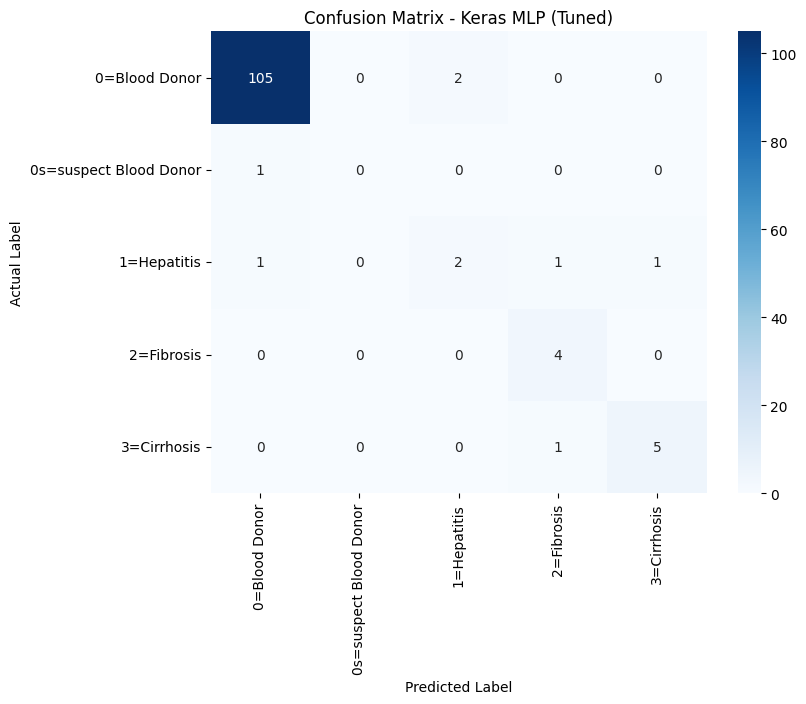

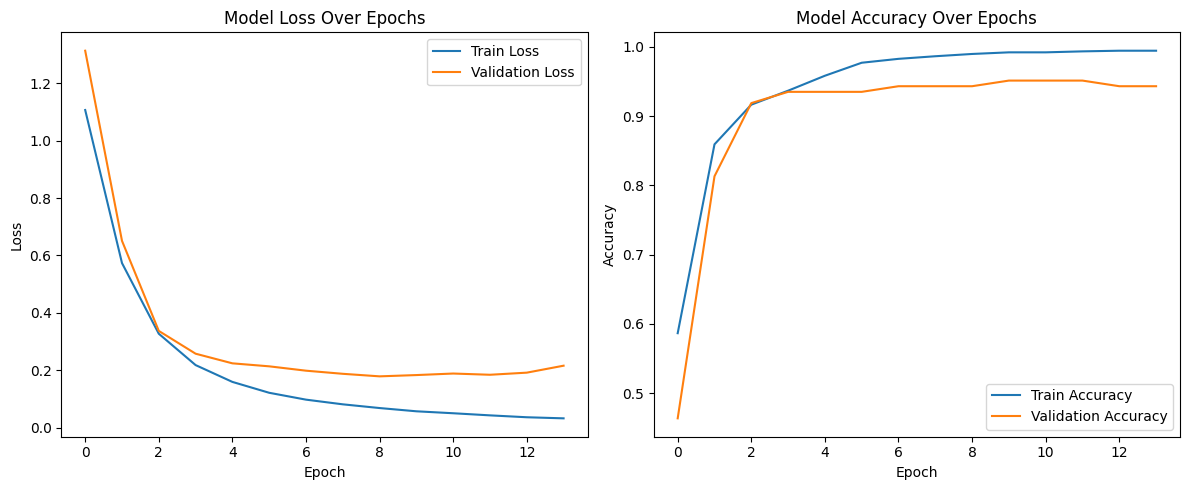

MLP model saved as mlp_smote.pkl


In [75]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

# ===============================
# HITUNG CLASS WEIGHT (UNTUK DATA IMBALANCE)
# ===============================
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train_smote),
    y=y_train_smote
)
class_weight_dict = dict(enumerate(class_weights))

print("Class Weights:", class_weight_dict)

# ===============================
# DEFINISI MODEL KERAS MLP
# ===============================
model_keras_mlp = Sequential([
    Input(shape=(X_train_smote.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(len(le_target.classes_), activation='softmax')
])

# ===============================
# COMPILE MODEL
# ===============================
model_keras_mlp.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # tuning LR eksplisit
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_keras_mlp.summary()

# ===============================
# EARLY STOPPING (TUNING EPOCH)
# ===============================
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# ===============================
# TRAIN MODEL (DENGAN TUNING)
# ===============================
start_time = time.time()

history_keras_mlp = model_keras_mlp.fit(
    X_train_smote,
    y_train_smote,
    epochs=100,                 # tuning epoch
    batch_size=32,
    validation_data=(X_test_scaled, y_test),
    callbacks=[early_stop],
    class_weight=class_weight_dict,   # tuning imbalance
    verbose=1
)

end_time = time.time()
print(f"\nTraining time: {end_time - start_time:.2f} seconds")

# ===============================
# EVALUASI MODEL
# ===============================
print("\n--- Keras MLP Tuned Model Evaluation ---")

y_pred_keras_proba = model_keras_mlp.predict(X_test_scaled)
y_pred_keras = np.argmax(y_pred_keras_proba, axis=1)

accuracy_keras = accuracy_score(y_test, y_pred_keras)
print(f"Accuracy: {accuracy_keras:.4f}")

print("\nClassification Report:")
print(classification_report(
    y_test,
    y_pred_keras,
    target_names=le_target.classes_,
    zero_division=0
))

# ===============================
# CONFUSION MATRIX
# ===============================
cm_keras = confusion_matrix(y_test, y_pred_keras)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm_keras,
    annot=True,
    fmt='d',
    xticklabels=le_target.classes_,
    yticklabels=le_target.classes_,
    cmap="Blues"
)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Keras MLP (Tuned)")
plt.show()

# ===============================
# VISUALISASI TRAINING HISTORY
# ===============================
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history_keras_mlp.history['loss'], label='Train Loss')
plt.plot(history_keras_mlp.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_keras_mlp.history['accuracy'], label='Train Accuracy')
plt.plot(history_keras_mlp.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# ===============================
# SAVE MODEL (.pkl)
# ===============================
joblib.dump(pipeline_mlp, "MLP.pkl")
print("MLP model saved as mlp_smote.pkl")


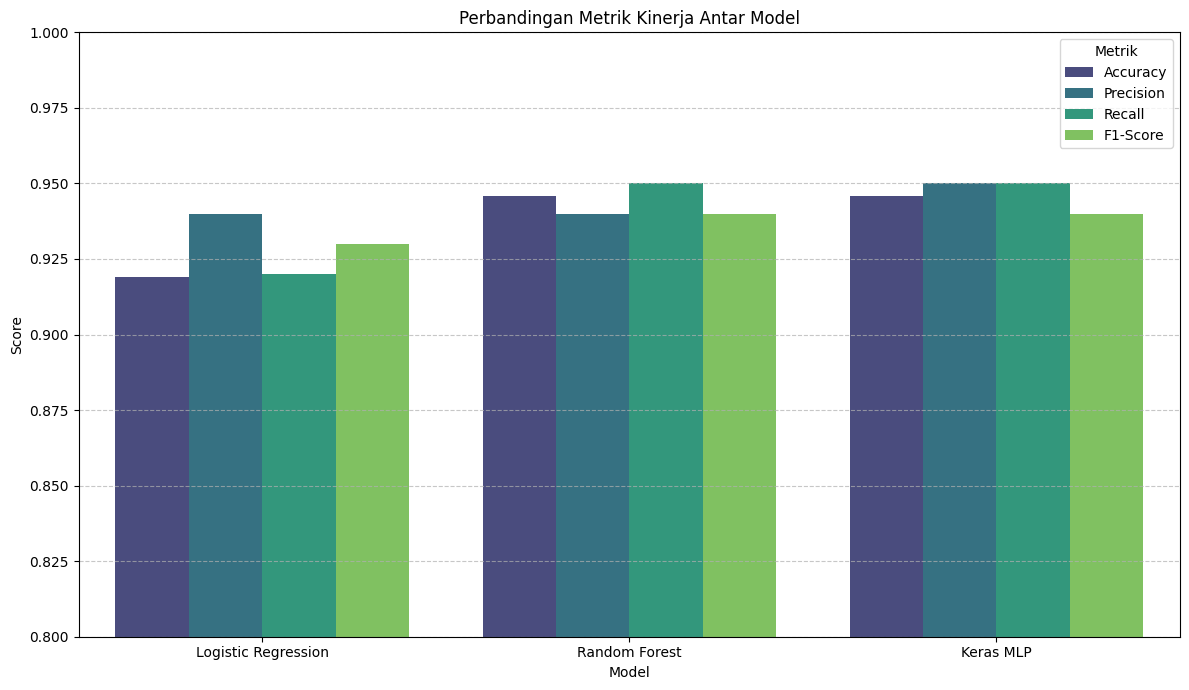

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data untuk plot (gunakan nilai dari tabel perbandingan di atas)
model_names = ['Logistic Regression', 'Random Forest', 'Keras MLP']
accuracy_scores = [0.919, 0.946, 0.946]
precision_scores = [0.94, 0.94, 0.95]
recall_scores = [0.92, 0.95, 0.95]
f1_scores = [0.93, 0.94, 0.94]

comparison_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-Score': f1_scores
})

# Ubah DataFrame ke format 'long' untuk Seaborn barplot
comparison_melted = comparison_df.melt('Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 7))
sns.barplot(x='Model', y='Score', hue='Metric', data=comparison_melted, palette='viridis')
plt.ylim(0.8, 1.0) # Sesuaikan batas y agar lebih fokus pada perbedaan
plt.title('Perbandingan Metrik Kinerja Antar Model')
plt.ylabel('Score')
plt.xlabel('Model')
plt.legend(title='Metrik')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [40]:
!pip freeze > requirements.txt
